In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [5]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [10]:
import io
 
dataset_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))
print(dataset_train)

            Date         Open         High          Low        Close  \
0     01/03/2012   325.250000   332.830000   324.970000       663.59   
1     01/04/2012   331.270000   333.870000   329.080000       666.45   
2     01/05/2012   329.830000   330.750000   326.890000       657.21   
3     01/06/2012   328.340000   328.770000   323.680000       648.24   
4     01/09/2012   322.040000   322.290000   309.460000       620.76   
...          ...          ...          ...          ...          ...   
1504  22/12/2017  1061.109985  1064.199951  1059.439941  1060.119995   
1505  26/12/2017  1058.069946  1060.119995  1050.199951   1056.73999   
1506  27/12/2017  1057.390015  1058.369995  1048.050049  1049.369995   
1507  28/12/2017  1051.599976  1054.750000  1044.770020  1048.140015   
1508  29/12/2017  1046.719971  1049.699951  1044.900024  1046.400024   

          Volume  
0      7,380,500  
1      5,749,400  
2      6,590,300  
3      5,405,900  
4     11,688,800  
...          ...  
15

In [11]:
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [12]:
training_set = dataset_train.iloc[:, 1: 2].values

In [13]:
training_set.shape


(1509, 1)

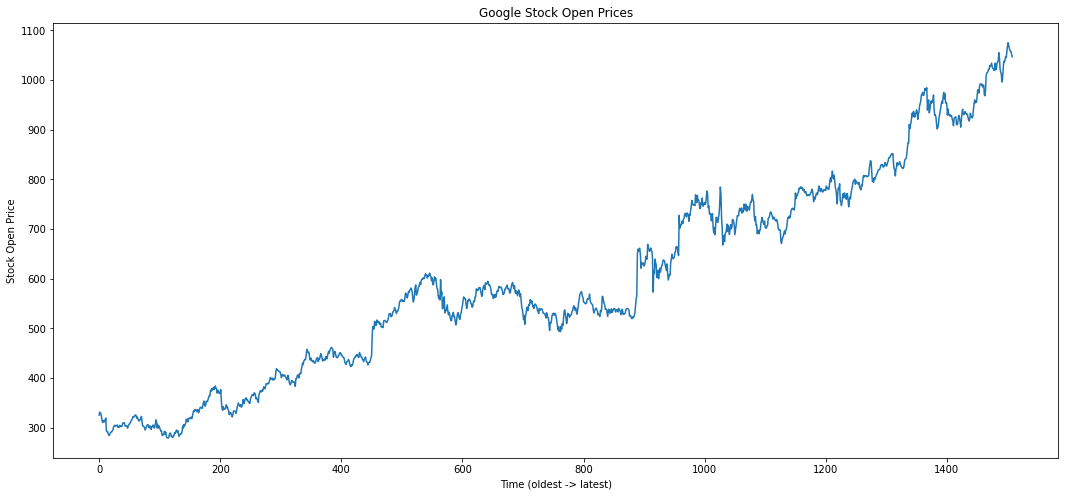

In [14]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


In [15]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [16]:
sc = MinMaxScaler(feature_range = (0, 1))

In [17]:
training_set_scaled = sc.fit_transform(training_set)

In [18]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train.shape

(1449, 60)

In [21]:
y_train.shape

(1449,)

In [22]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [23]:
X_train.shape

(1449, 60, 1)

In [24]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))


regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

regressor.add(Dense(units = 1))

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [26]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)


Epoch 1/100
46/46 [==============================] - 15s 124ms/step - loss: 0.0286
Epoch 2/100
46/46 [==============================] - 6s 121ms/step - loss: 0.0039
Epoch 3/100
46/46 [==============================] - 6s 126ms/step - loss: 0.0036
Epoch 4/100
46/46 [==============================] - 5s 115ms/step - loss: 0.0036
Epoch 5/100
46/46 [==============================] - 6s 132ms/step - loss: 0.0031
Epoch 6/100
46/46 [==============================] - 5s 119ms/step - loss: 0.0033
Epoch 7/100
46/46 [==============================] - 6s 128ms/step - loss: 0.0029
Epoch 8/100
46/46 [==============================] - 7s 160ms/step - loss: 0.0034
Epoch 9/100
46/46 [==============================] - 6s 128ms/step - loss: 0.0032
Epoch 10/100
46/46 [==============================] - 7s 156ms/step - loss: 0.0028
Epoch 11/100
46/46 [==============================] - 6s 122ms/step - loss: 0.0027
Epoch 12/100
46/46 [==============================] - 6s 121ms/step - loss: 0.0023
Epoch 13/100

In [27]:
uploaded2 = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [30]:
dataset_test = pd.read_csv(io.BytesIO(uploaded2['Google_Stock_Price_Test.csv']))
print(dataset_test)

           Date         Open         High          Low        Close   Volume
0    02/01/2018  1048.339966  1066.939941  1045.229980  1065.000000  1237600
1    03/01/2018  1064.310059  1086.290039  1063.209961  1082.479980  1430200
2    04/01/2018  1088.000000  1093.569946  1084.001953  1086.400024  1004600
3    05/01/2018  1094.000000  1104.250000  1092.000000  1102.229980  1279100
4    08/01/2018  1102.229980  1111.270020  1101.619995  1106.939941  1047600
..          ...          ...          ...          ...          ...      ...
120  25/06/2018  1143.599976  1143.910034  1112.780029  1124.810059  2157300
121  26/06/2018  1128.000000  1133.209961  1116.659058  1118.459961  1563200
122  27/06/2018  1121.339966  1131.836060  1103.619995  1103.979980  1293900
123  28/06/2018  1102.089966  1122.310059  1096.010010  1114.219971  1072400
124  29/06/2018  1120.000000  1128.227051  1115.000000  1115.650024  1315100

[125 rows x 6 columns]


In [31]:
dataset_test.head()


,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [32]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [34]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [35]:
inputs = inputs.reshape(-1, 1)

In [36]:
inputs = sc.transform(inputs)

In [37]:
len(inputs)

185

In [38]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [39]:
X_test.shape

(125, 60, 1)

In [40]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 31ms/step


In [41]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

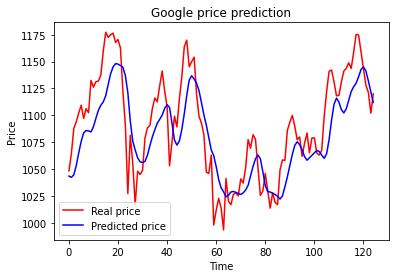

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()